<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Python_DataAnalysis_ML/4_%EC%99%95%EC%A2%8C%EC%9D%98%EA%B2%8C%EC%9E%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공부할때는 우선 각 코드가 어떻게 돌아가는지도 확인해라

돌아가는 순서도 확인하고 각 코드가 실행하는게 무엇무엇인지 계속 확인하기

데이터 구글 드라이브 연결

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

#케글에 구글로 로그인. 나중에 확인하기

In [ ]:
#현재 작업 디렉토리가 content 다. 코랩에서 현재 쓰는 디렉토리다. 최상위 디렉토리
!pwd

/content


In [ ]:
#구글 드라이브 사용하기(드라이브 마운트(연결))
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pandas 안에 read_csv 기능이 있다. 그 파일을 읽어올 수 있는 함수

#파일 불러오기. 첫번쨰꺼는 경로복사, 두번째꺼는 utf-8 은 안쓰면 한글 사용할때 한글이 깨진다(이상하게 나온다).
battles = pd.read_csv('/content/drive/MyDrive/battles.csv', encoding = 'utf-8')
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [ ]:
#어느나라 글자를 쓰던 잘 돌아가게끔 utf-8 을 써주는게 좋다
death = pd.read_csv('/content/drive/MyDrive/character-deaths.csv', encoding = 'utf-8')
death.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


책의 권별로 사망자 수 추이 시각화

In [ ]:
death['Book of Death']

0      NaN
1      3.0
2      NaN
3      5.0
4      NaN
      ... 
912    NaN
913    5.0
914    5.0
915    5.0
916    4.0
Name: Book of Death, Length: 917, dtype: float64

In [ ]:
#Series.value-counts() 각각의 값의 갯수를 알려준다. dataframe이 아닌 series 함수
death['Book of Death'].value_counts()
#각각의 권에서 죽은 사람의 수를 알 수 있다.

3.0    97
2.0    73
5.0    61
1.0    49
4.0    27
Name: Book of Death, dtype: int64

In [ ]:
#책 몇권인지 순서에 맞게 정렬하는게 보기 편하다. 그래프 그리기 위해서 정렬

#sort_index()를 쓰면 앞에 숫자(인덱스)를 정렬하고 sort_values 를 쓰면 뒤에 값들을 작은거부터 정렬한다.
bookOfDeath = death['Book of Death'].value_counts().sort_index()
bookOfDeath

1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

<Axes: >

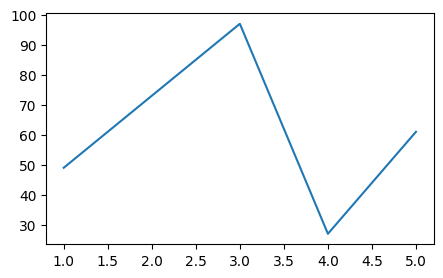

In [ ]:
#figsize : 그래프 크기 조절
#단위는 인치다
bookOfDeath.plot(figsize=(5,3))

<Axes: >

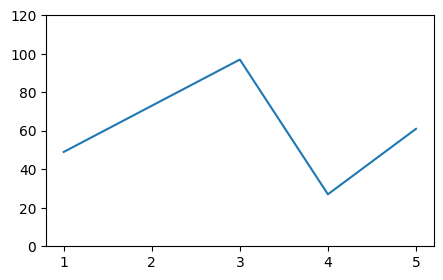

In [ ]:
bookOfDeath.plot(figsize =(5,3), xticks = bookOfDeath.index, ylim = [0,120])
#                                x축 간격을 인덱스로,        y축 limit 설정

공격과 수비진영의 숫자 시각화(10,000 이상 전투)

In [ ]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [ ]:
big_battles = battles[ battles.attacker_size + battles.defender_size >= 10000]
#정렬을 해놓으면 head 와 tail을 사용해서 최대, 최솟값 찾기 가능
big_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands,NaN


<Axes: ylabel='name'>

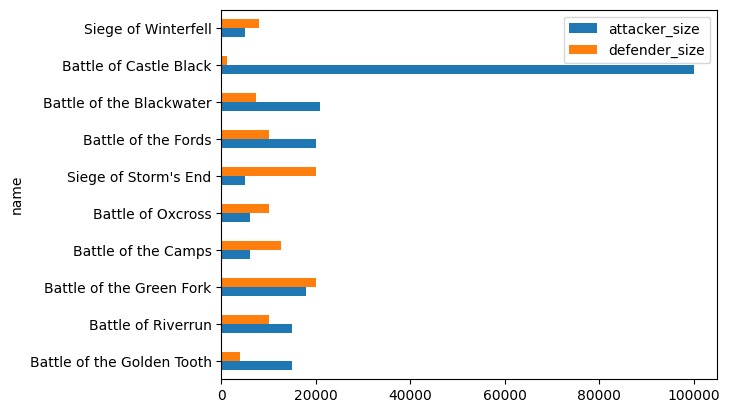

In [ ]:
#양을 나타내는거는 막대그래프가 유용하다.
big_battles = big_battles[ ['name', 'attacker_size', 'defender_size']]
big_battles.plot(kind = 'barh',              #bar보다 barh가 가로축으로 보기 편하다. 특히 이름이 긴경우에....
                 x = 'name')        #x축 이름 설정

가문별로 전투에 참여한 회수

In [ ]:
#attacker1 - defender 4 까지 잘라오기 직접지정. 하나하나 다 써야 할 수 도 있고, 다음 코드창처럼 한번에 쓸수도 있고.
battles[ ['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']].head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


In [ ]:
#컬럼 슬라이싱(가로세로 다 슬라이싱 할수도 있고, )
#':'를 앞뒤에 아무것도 안쓰고 사용하면 첨부터 끝까지 전부다 의미

#   앞에꺼는 세로줄 전부다 의미,  여기는 'attacker_1' 부터 'defender_4'까지 의미
battles.loc[:, 'attacker_1' : 'defender_4'].head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


In [ ]:
#컬럼 슬라이싱. :에 앞뒤가 다 없으면 전부다.
#앞에껀 세로, 뒤에껀 가로
battles.loc[:, 'attacker_1':'defender_4'].head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


## 데이터 베이스 면접
foreign key 개념, 중복의 최소화를 위해서 여러가지 join을 사용한다.
restirct, distinct 등에 대해서 자세히 얘기를 한다.

정형,비정형 데이터

정형 : 표 형태 relation

비정형 데이터 : 아무렇게나 산발된 데이타. 인스타, sns 같은거. 사진, 글씨든 뭐든 지맘대로 형태가 안정해져 있다. 시대가 바뀌어서 이것도 다뤄야 해서 시대의 발전에 맞춰 빅데이터 분석이란게 나왔다.

뿌리는 같다(책에는 없다.)

In [ ]:
#세로에 대한건 전체 다나올거니까 column 만 나오게 써보자
battles [ battles.columns[5:13] ].head()
#head 에 괄호를 안쓰면 에러가 생긴다....

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


In [ ]:
battle_house = battles[ battles.columns[5:13] ]
#values_count 로 안에 있는 항목별로 몇개씩 있는지 집계해준다.
battle_house.attacker_1.value_counts()

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Bolton                         2
Frey                           2
Darry                          1
Brotherhood without Banners    1
Free folk                      1
Brave Companions               1
Bracken                        1
Name: attacker_1, dtype: int64

In [ ]:
#결측치가 있으면 어떻게 되는지 보여준거고(값이 이상해질 경우가 많아서)

battle_house.attacker_1.value_counts() + battle_house.attacker_2.value_counts()
#attacker_1과 attacker_2 둘중에 하나라도 Nan 이면 Nan이 된다.

Baratheon                      NaN
Bolton                         3.0
Bracken                        NaN
Brave Companions               NaN
Brotherhood without Banners    NaN
Darry                          NaN
Free folk                      NaN
Frey                           3.0
Greyjoy                        8.0
Karstark                       NaN
Lannister                      9.0
Stark                          NaN
Thenns                         NaN
Tully                          NaN
dtype: float64

In [ ]:
#add 라는함수를 이용

#결측치를 어떻게 처리해야하는가를 보여준거다.

#이번에는 평균이 아니라 전투횟수니까 0을 넣어주는게 맞다(nan은 전투를 안했다라는 뜻이니까)
battle_house.attacker_1.value_counts().add( battle_house.attacker_2.value_counts(), fill_value = 0 )
                                                                                    #fill_value 는 값이 없으면 0으로 처리

Baratheon                      6.0
Bolton                         3.0
Bracken                        1.0
Brave Companions               1.0
Brotherhood without Banners    1.0
Darry                          1.0
Free folk                      1.0
Frey                           3.0
Greyjoy                        8.0
Karstark                       2.0
Lannister                      9.0
Stark                          8.0
Thenns                         1.0
Tully                          3.0
dtype: float64

In [ ]:
house_to_battle_count = pd.Series()

#배틀 하우스의 column을 하나하나 col 에 넣어서 반복문으로 돌린다.
#Battle_house 의 attacker_1 ~ defender_4까지의 column에 있는 값들을 다 더해준다.
#여기서는 value_counts()를 이용해서 각 column별로 가문이름이 몇번 들어가 있는지를 계산하고 그것들을 전부 다 더해준다.
for col in battle_house.columns:
    house_to_battle_count = house_to_battle_count.add( battle_house[col].value_counts(), fill_value = 0)

#각 가문별로 attacke_1 ~ defender_4까지에서 몇번씩 싸웠는가의 총합이 나왔다.
house_to_battle_count

<ipython-input-21-03134f868cab>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  house_to_battle_count = pd.Series()


Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

<Axes: >

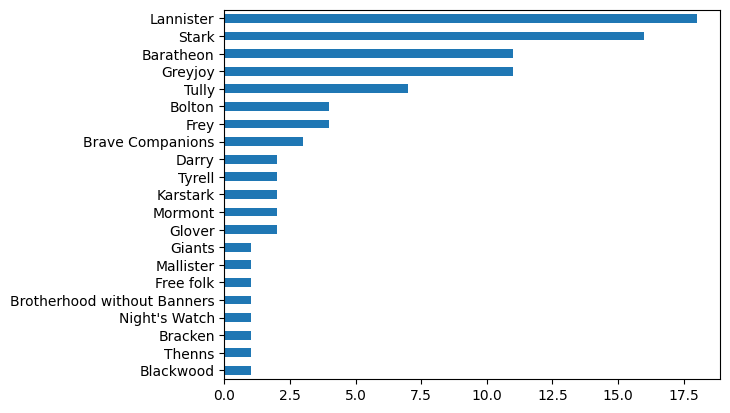

In [ ]:
#각 가문이 몇번 싸웠나에 관한 데이터를 시각화
house_to_battle_count.sort_values().plot(kind = 'barh')

년도별 사망자 숫자, 전쟁이 벌어진 횟수 시각화

In [ ]:
death_for_year = death['Death Year'].value_counts().sort_index()
death_for_year

297.0      3
298.0     46
299.0    156
300.0    100
Name: Death Year, dtype: int64

In [ ]:
battle_for_year = battles.year.value_counts()
battle_for_year

299    20
300    11
298     7
Name: year, dtype: int64

In [ ]:
#사망자 숫자와 전쟁이 벌어진 횟수를 한번에 볼 수 있게끔
data = pd.concat([ death_for_year, battle_for_year], axis=1)
data.columns= ['death','battles']
data

,death,battles
297.0,3,NaN
298.0,46,7.0
299.0,156,20.0
300.0,100,11.0


<Axes: xlabel='year'>

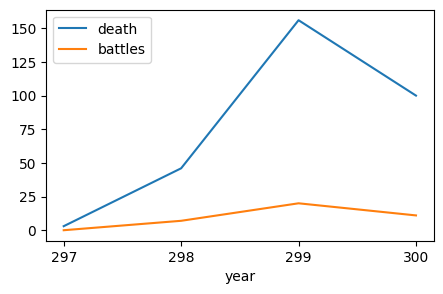

In [ ]:
#그냥 data.plot() 을 쓰면 끊겨서 나온다.
#방지하기 위해 data.fillna(0) 으로 채우고 나서 다시 실행해봐라

#inplace : 그값으로 그냥 적용 시켜라
data.fillna(0, inplace = True)          #Nan값을 0으로 설정해서 그래프 그려줌
data.plot(figsize = (5,3), xticks = data.index, xlabel = 'year')